# Trabalho 1
# Codificação de arquivos e operações pontuais

-------

1) Utilizando a seguinte [imagem colorida](https://ead.ime.uerj.br/pluginfile.php/176/mod_assign/intro/VisaoTrab1.tiff), implemente  e demonstre as diferenças entre as versões a serem salvas nos formatos de arquivo a seguir: 

* JPEG - 10%
* JPEG - 50%
* JPEG - 90%
* TIFF - LZW

Para diferenciar as imagens armazenadas nos arquivos da imagem original utilize como métrica a média do erro quadrático dos pixels em cada um dos canais e o tamanho dos arquivos.

Explique os resultados obtidos em função da teoria apresentada nas aulas.

-------

2) Utilizando mesma [imagem colorida](https://ead.ime.uerj.br/pluginfile.php/176/mod_assign/intro/VisaoTrab1.tiff), implemente uma correção gama para corrigir a luminância da face do bebê. Para tanto são necessários os seguintes passos:

* Leitura da imagem de entrada no formato colorido rgb do openCV
* Conversão do sistema de cor da imagem para hsv
* Aplicação da correção gama sobre o canal v
* Conversão da imagem resultante para rgb
* Salvar a imagem no formato tiff sem compressão.

Explique os resultados obtidos em função da teoria apresentada nas aulas. Utilize como fermenta o histograma das imagens.

-------

## Bibliotecas

Na célular seguinte estão as bibliotecas usadas para resolver o trabalho como um todo.

In [1]:
%matplotlib inline

import cv2
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 22})

sns.set_style("whitegrid")

-------

# Parte (1)

Abaixo lemos a imagem **VisaoTrab1.tiff** que está no formato **.tiff**. A sigla **.tiff**, do inglês, é a abreviação de *Tagged Image File Format*, trata-se de um formato para imagens digitais, que consegue salvar imagens sem perda de informação.

In [2]:
img = cv2.imread('../images/VisaoTrab1.tiff', cv2.IMREAD_UNCHANGED)

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(512, 512, 3)

### Cuidados ao mostrar a imagem!

Uma vez que a imagem foi carregada, podemos vê-la. Para fazer a visualização iremos utilizar a biblioteca **matplotlib**. Abaixo temos duas formas de olhar a imagem original, porém há certas particularidades que serão explicadas logo em seguida.

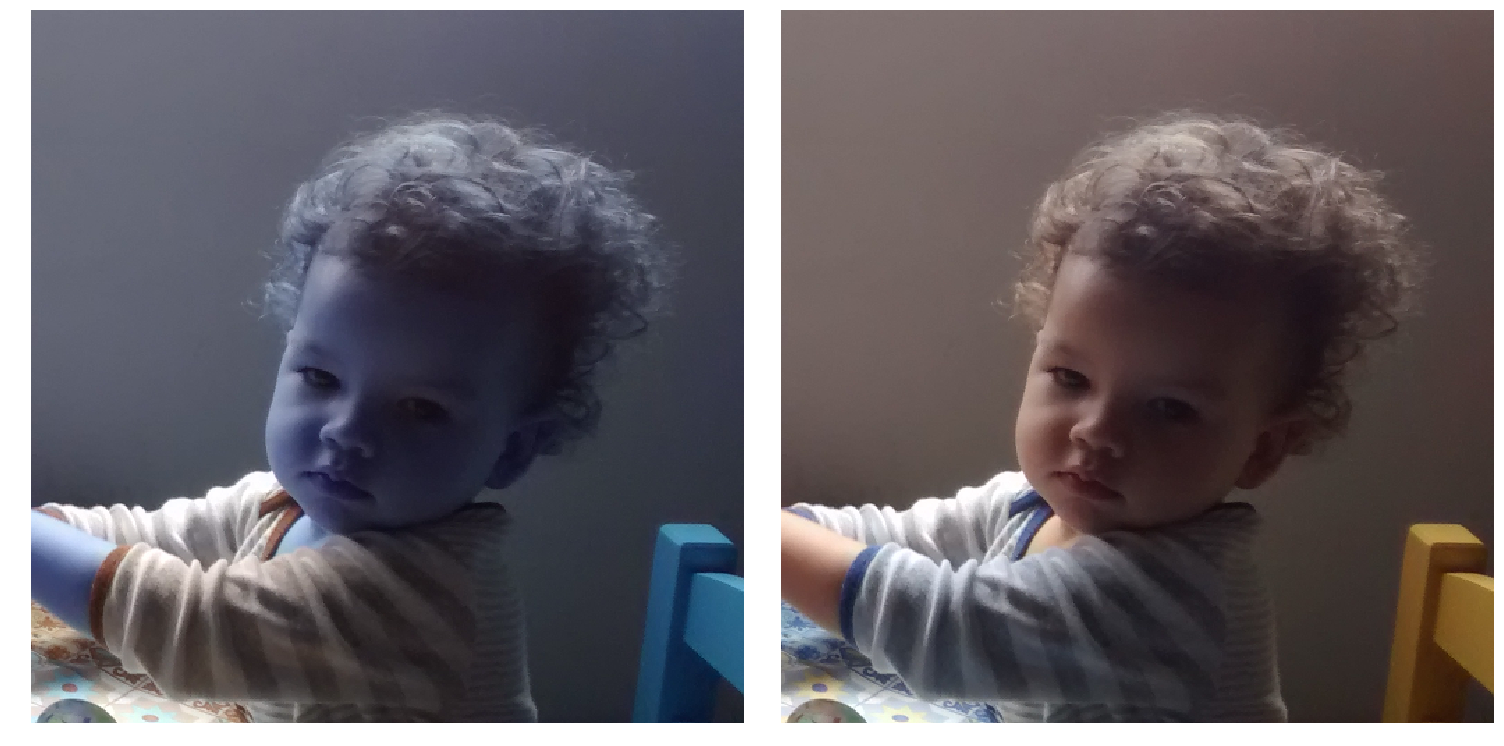

In [5]:
fig = plt.figure(figsize = (21, 15))

_ = plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

_ = plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

A biblioteca **opencv** carrega as cores das imagens na sequência BGR (*Blue*, *Green*, *Red*), que é contrária ao padrão convencional dado por RGB (*Red*, *Green*, *Blue*).

Ao mostrarmos a imagem, podemos ver que a representação do lado esquerdo parece ter a tonalidade de cores mais azulada, algo que não acontece na representação do lado direito. De fato, a imagem do lado esquerdo está com a atribuição errada das cores, isto é, tentamos mostrar uma imagem, que tem a tupla de cores ordenada como BGR, da forma RGB. Assim, para que possamos ver as cores originais da imagem, precisamos fazer a conversão de BGR para RGB, que é feita utilizando o parâmetro **cv2.COLOR_BGR2RGB** da biblioteca **opencv**.

## Salvando as imagens

Agora podemos salvar a imagem em formatos e especificações diferentes.

Neste trabalho iremos salvar a imagem original em 4 especificações diferentes, que são:
* jpeg - 10%
* jpeg - 50%
* jpeg - 90%
* tiff - lzw

### JPEG

O formato ```jpeg``` é amplamente usado em ambientes web, uma vez que possi variados níveis de compressão. ```jpeg``` tem informação para cada uma das cores na escala *RGB* sendo que cada cor tem 256 valores diferentes.

A porcentagem das especificações acima representam o fator de qualidade das imagens a serem salvas, isto é, 10%, por exemplo, quer dizer que a imagem salva tem qualidade referente a 10% da imagem original. O fator de qualidade da imagem influencia no tamanho da mesma; quando menor o fator, menor será o tamanho do arquivo.


### TIFF

O formato ```tiff``` assim como o ```jpeg``` também é um formato para armazenar imagens. No caso o parâmetro ```lzw``` significa *Lempel-Ziv-Welch* que é um algorito de compressão de informação sem perdas. Uma imagem salva em ```tiff - lzw``` quer dizer, então, que a informação original é toda registrar sem que haja perdas.




In [6]:
# JPEG - 10%
cv2.imwrite('../images/VisaoTrab1_10.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])

# JPEG - 50%
cv2.imwrite('../images/VisaoTrab1_50.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 50])

# JPEG - 90%
cv2.imwrite('../images/VisaoTrab1_90.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])

# TIFF - LZW
cv2.imwrite('../images/VisaoTrab1_LZW.tiff', img)

True

### Carregando imagens salvas

Para podermos comparar as imagens salvas acima, é preciso que cada uma seja carregada.

In [7]:
jpeg_10 = cv2.imread('../images/VisaoTrab1_10.jpg', cv2.IMREAD_UNCHANGED)
jpeg_50 = cv2.imread('../images/VisaoTrab1_50.jpg', cv2.IMREAD_UNCHANGED)
jpeg_90 = cv2.imread('../images/VisaoTrab1_90.jpg', cv2.IMREAD_UNCHANGED)
tiff_lzw = cv2.imread('../images/VisaoTrab1_LZW.tiff', cv2.IMREAD_UNCHANGED)

In [8]:
print(jpeg_10.shape, jpeg_50.shape, jpeg_90.shape, tiff_lzw.shape)

((512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3))


### Mostrando as Imagens

Podemos ver abaixo as novas versões das imagens. Fica evidente que no formato ```jpeg - 10%``` houve grande degradação em comparação com a imagem original.

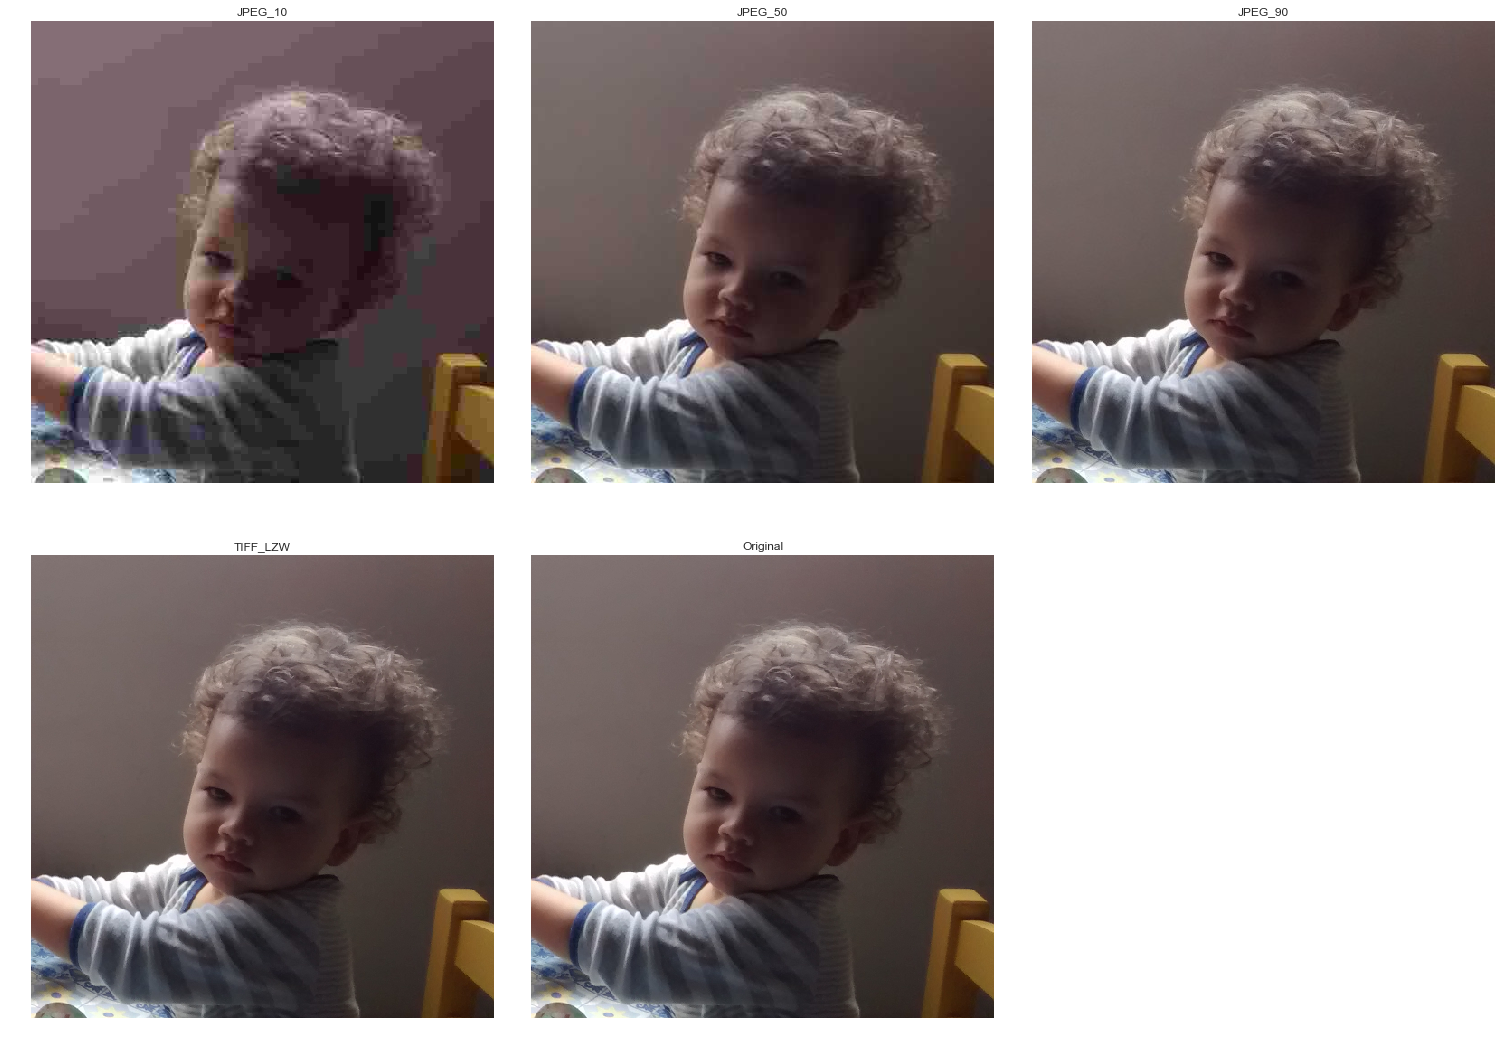

In [9]:
fig = plt.figure(figsize = (21, 15))

_ = plt.subplot(2, 3, 1) 
plt.title('JPEG_10')
plt.imshow(cv2.cvtColor(jpeg_10, cv2.COLOR_BGR2RGB))
plt.axis('off')

_ = plt.subplot(2, 3, 2)
plt.title('JPEG_50')
plt.imshow(cv2.cvtColor(jpeg_50, cv2.COLOR_BGR2RGB))
plt.axis('off')

_ = plt.subplot(2, 3, 3)
plt.title('JPEG_90')
plt.imshow(cv2.cvtColor(jpeg_90, cv2.COLOR_BGR2RGB))
plt.axis('off')

_ = plt.subplot(2, 3, 4)
plt.title('TIFF_LZW')
plt.imshow(cv2.cvtColor(tiff_lzw, cv2.COLOR_BGR2RGB))
plt.axis('off')

_ = plt.subplot(2, 3, 5)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

## Erro Médio Quadrático

Como métrica de comparação entre as imagens, podemos utilizar o Erro Quadrático Médio (*MSE*, do inglês, *Mean Squared Error*), que é dado pela seguinte equação:

$$
MSE(\hat{p}) = \frac{1}{M N}\sum\limits^{M}_{i = 1}\sum\limits^{N}_{j = 1}(p_{i,j} - \hat{p}_{i,j})^{2}
$$

em que $p$ corresponde aos pixels da imagem original, $\hat{p}$, aos pixels das images salvas em formatos diferentes da original, e $N$ e $M$ são as dimensões das imagens.

Para que possamos calcular o *MSE* para cada imagem diferente da original, precisamos primeiro separar as intensidades de cores. Isto pode ser feito usando o método ```cv2.split``` da biblioteca **opencv**, que retorna as tonalidades na ordem *blue*, *green* e *red*. 

Como iremos computar o *MSE* para cada uma das imagens, vamos definir a função abaixo ```mse_color``` que recebe a imagem original e uma imagem diferente, e retorna o *MSE* para cada uma das cores.

In [10]:
def mse(img1, img2):
    m, n = img1.shape
    return np.sum(np.sum((img1 - img2)**2, axis = 1), axis = 0) / (m * n)

def mse_color(img1, img2):
    # O método .split da biblioteca opencv faz a separação das cores
    img1_colors = cv2.split(img1)
    img2_colors = cv2.split(img2)
    mse_b = mse(img1_colors[0], img2_colors[0])
    mse_g = mse(img1_colors[1], img2_colors[1])
    mse_r = mse(img1_colors[2], img2_colors[2])
    
    mse_t = np.floor((mse_r + mse_g + mse_b) / 3)
      
    return mse_t

In [11]:
mse_jpeg_10 = mse_color(img, jpeg_10)
mse_jpeg_50 = mse_color(img, jpeg_50)
mse_jpeg_90 = mse_color(img, jpeg_90)
mse_tiff_lzw = mse_color(img, tiff_lzw)

## Avaliação das imagens salvas

Para avaliarmos de uma forma quantitativa qual foi a degradação as novas versões em relação a imagem original, usamos o resultado do *MSE*. Neste caso, o resultado do *MSE* nos diz o quão afastado estão os valores de cada pixel para cada intensidade de cor em relação aos pixels referência da imagem original.

In [12]:
print("MSE JPEG - 10%")
print(mse_jpeg_10)

print("MSE JPEG - 50%")
print(mse_jpeg_50)

print("MSE JPEG - 90%")
print(mse_jpeg_90)

print("MSE TIFF - LZW")
print(mse_tiff_lzw)

MSE JPEG - 10%
40.0
MSE JPEG - 50%
8.0
MSE JPEG - 90%
3.0
MSE TIFF - LZW
0.0


Como era de se esperar, o formato ```jpeg - 10%``` foi o que mais degradou a imagem, de modo que suas intensidades de cores tem grande *MSE*. Quanto maior o fator de qualidade para os formatos ```jpeg```, menor é o valor do *MSE*, visto que a compressão foi melhor, e consequentemente a informação original foi mais preservada.

O formato ```tiff - lzw```, por sua vez, manteve a imagem original, e, portanto, seu *MSE* é zero.

In [13]:
import subprocess

In [14]:
subprocess.check_output(['ls', '-lth', '../images/']).split('\n')

['total 2664',
 '-rw-r--r--  1 brancaleone  staff   312K Oct  1 17:07 VisaoTrab1_LZW.tiff',
 '-rw-r--r--  1 brancaleone  staff    35K Oct  1 17:07 VisaoTrab1_90.jpg',
 '-rw-r--r--  1 brancaleone  staff    13K Oct  1 17:07 VisaoTrab1_50.jpg',
 '-rw-r--r--  1 brancaleone  staff   6.7K Oct  1 17:07 VisaoTrab1_10.jpg',
 '-rw-r--r--@ 1 brancaleone  staff    71K Sep 23 21:17 messi5.jpg',
 '-rw-r--r--  1 brancaleone  staff    74K Sep 23 19:11 messi_2.png',
 '-rw-r--r--@ 1 brancaleone  staff   768K Sep 23 18:48 VisaoTrab1.tiff',
 '-rw-r--r--@ 1 brancaleone  staff    25K Sep 23 18:30 opencv_messi.jpg',
 '']

Além do *MSE* de cada nova imagem, podemos comparar o tamanho dos arquivos. Na célula acima, os arquivos com nome ```VisaoTrab1_*``` são os relevantes para o exercício.

Organizando as informações temos:


|  Formato    |   Nome do Arquivo     | Tamanho  | MSE    |
|:-----------:|:---------------------:|---------:|-------:|
|  original   | VisaoTrab1.tiff       | 768 K    | 0      |
|  jpeg 10%   | VisaoTrab1_10.jpg     | 6.7 K    | 40     |
|  jpeg 50%   | VisaoTrab1_50.jpg     | 13 K     | 8      |
|  jpeg 90%   | VisaoTrab1_90.jpg     | 35 K     | 3      |
|  tiff lzw   | VisaoTrab1_LZW.tiff   | 312 K    | 0      |     

Como era de se esperar, a imagem ```jpeg - 10%``` por ter fator de qualidade menor, também apresenta menor tamanho de arquivo. Além disso, o formato ```tiff - lzw```, apesar de não apresentar perdas de informação, como foi visto pelo seu valor de *MSE*, apresenta tamanho menor que a original, isto acontece pois há compressão na imagem, mas esta compressão não compromete a informação armazenada.

-------

In [15]:
def histograma(img, formato = 'rgb'):
    m, n = img[:,:,0].shape  
    
    if formato == 'rgb':
        hist = []
        center = []
        mean = []
        std = []
        for color in range(0, 3):
            h, bins = np.histogram(img[:,:,color], range = (0, 256), bins = 64)
            h = h/float(m * n)
            c = (bins[:-1] + bins[1:]) / 2
            
            m = np.mean(img[:,:,color])
            s = np.std(img[:,:,color])
            
            hist.append(h)
            center.append(c)
            mean.append(m)
            std.append(s)
            
    elif formato == 'hsv':
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hist, bins = np.histogram(img[:,:,2], range = (0, 256), bins = 64)
        hist = hist / float(m * n)
        center = (bins[:-1] + bins[1:]) / 2
        mean = np.mean(img[:,:,2])
        std = np.std(img[:,:,2])
        
    else:
        print "Formato não reconhecido!"

    return hist, center, mean, std

In [16]:
def corregao_gamma(img, gamma = 0.5):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Separa o canal V (value) do formato HSV
    value = img_hsv[:,:,2]
    app_gamma = np.float32(value) / 255.0
    app_gamma = np.uint8(app_gamma ** gamma * 255.0)
    
    img_hsv[:,:,2] = app_gamma
    
    return cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

-------

# Parte (2)

Nesta parte do trabalho iremos corrigir a luminância da face do bebê. Iremos trabalhar apenas com a imagem original, que já está carregada na variável ```img```.

Para modificar o valor da brilho da imagem, primeiro iremos converter ela do formato *BGR* para *HSV*, que signigica, do inglês, *hue* (tonalidade), *saturation* (saturação) e *value* (brilho). 

Com a biblioteca **opencv**, podemos converter a imagem de *BGR* para *HSV* usando a função **cv2.cvtColor(<imagem.>, cv2.COLOR_BGR2HSV)**.

Em teoria, as intensidades das cores em *BGR* são normalizadas para valores entre ```[0, 1]```. Para calcular *H*, temos: 

$$
H := \begin{cases}
    0, & \text{if}\; MAX = MIN \Leftrightarrow R = G = B \\
    60^\circ \cdot \left( 0 + \frac {G - B} {MAX - MIN} \right), & \text{if}\; MAX = R \\
    60^\circ \cdot \left( 2 + \frac {B - R} {MAX - MIN} \right), & \text{if}\; MAX = G \\
    60^\circ \cdot \left( 4 + \frac {R - G} {MAX - MIN} \right), & \text{if}\; MAX = B
   \end{cases}
$$

onde se $H < 0^{o}$, $H := H + 360^{o}$.

Para calular *S*,

$$
S := \begin{cases}
    0, & \text{if}\; MAX = 0 \Leftrightarrow R = G = B \\
    \frac{MAX - MIN}{MAX}
    \end{cases}
$$

E, por último, para determinar *V*, temos:

$$
V := MAX
$$

em que MAX e MIN representam o valor máximo e mínimo dos valores *RGB*.

## Correção Gamma

A correção gamma permite modificar a estensão do contraste de intensidade da imagem. A partir desta correção, podemos deixar imagens mais claras ou mais escuras.

Matematicamente, a correção gamma é uma função

$$h(u): u \rightarrow v$$

com $u$ e $v \in \mathbb{C}$ sendo que 

$$h(u) = u^{\gamma}$$

onde $\gamma$ é o fator de correção a ser aplicado.

A correção gamma foi implementada na função ```correcao_gamma```, que recebe como parâmetro a imagem e o valor da correção. Na célula abaixo aplicamos uma correção de $\gamma = 0.5$, que é o valor padrão da função.

In [17]:
img_gamma = corregao_gamma(img)

In [18]:
hist_orig = histograma(img, 'hsv')
hist_gamma = histograma(img_gamma, 'hsv')

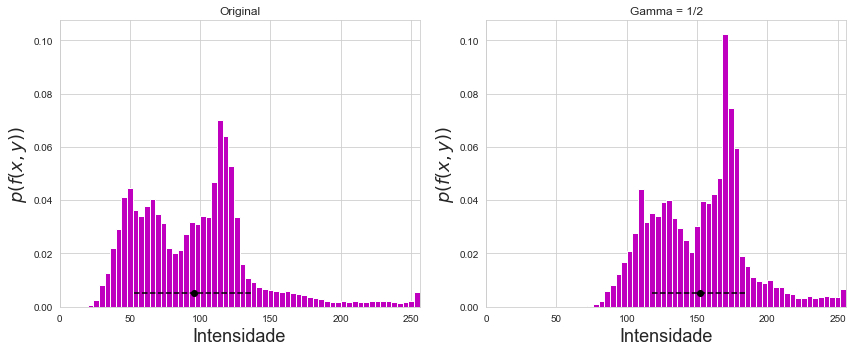

In [19]:
fig = plt.figure(figsize = (12, 5))

m_y = 0.005

ax1 = plt.subplot(1, 2, 1)
plt.bar(hist_orig[1], hist_orig[0], align = 'center', color = 'm', width = 4)
plt.xlabel('Intensidade', fontsize = 18)
plt.ylabel('$p(f(x, y))$', fontsize = 18)
plt.plot(hist_orig[2], m_y, 'ko')
plt.plot([hist_orig[2] - hist_orig[3], hist_orig[2] + hist_orig[3]], [m_y] * 2, 'k--')
plt.title('Original')
plt.xlim([0, 256])
plt.ylim([0, 1.5])

ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.bar(hist_gamma[1], hist_gamma[0], align = 'center', color = 'm', width = 4)
plt.xlabel('Intensidade', fontsize = 18)
plt.ylabel('$p(f(x, y))$', fontsize = 18)
plt.plot(hist_gamma[2], m_y, 'ko')
plt.plot([hist_gamma[2] - hist_gamma[3], hist_gamma[2] + hist_gamma[3]], [m_y] * 2, 'k--')
plt.title('Gamma = 1/2')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

Além da comparação visual, após a aplicação da correção, podemos compara o histograma de cada uma das imagens. Acima estão os histogramas, podemos perceber que para $\gamma = 0.5$, a intensidade da imagem corrigida, à direita, possui um brilho maior, apresentando uma distribuição deslocada mais para a direita em comparação com o histograma da imagem original, à esquerda.

Abaixo podemos comparar as imagens antes e depois da correção, e vemos que após a correção a imagem ficou mais clara, e as regiões escuras diminuiram (como vemos no histograma).

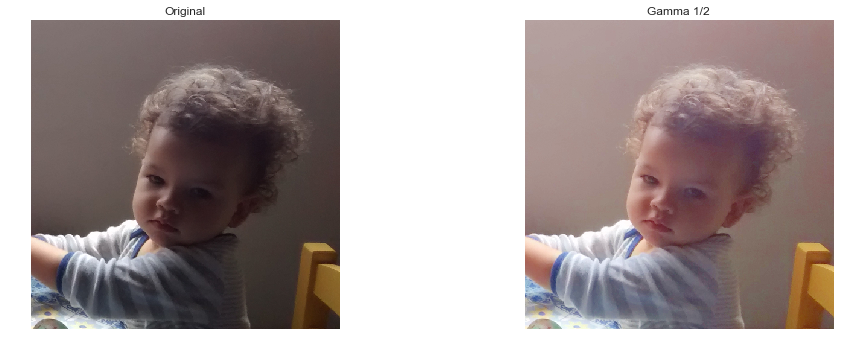

In [21]:
fig = plt.figure(figsize = (15, 5))

_ = plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

_ = plt.subplot(1, 2, 2)
plt.title('Gamma 1/2')
plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

### Salvando a Imagem Corrigida

Na última célula abaixo salvamos a nova imagem corrigida pela correção gamma.

In [22]:
cv2.imwrite('../images/VisaoTrab1_gamma.tiff', img_gamma)

True